In [1]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import exp_params
from qutip import *
from targets import *

# from estimation import *
import matplotlib as mpl

USING Q-FUNCTION POINTS


# Setting some npz paths, colors, and standards

In [13]:
cm = 1 / 2.54
label_fontsize = 12
markersize = 5
linewidth = 1

fontname = "Corbel"
mpl.rc("font", family=fontname)

wigner_colors = ["crimson", "white", "navy"]
# wigner_custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(
#     "CrimsonToNavy", wigner_colors, N=256
# )
wigner_custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "bwr", wigner_colors, N=256
)

color_Q = "purple"
color_W_corr = "#D85600"
color_W_norm = "#27530A"


half_width_dims = (8.6 * cm, 6 * cm)


W_exp_directory = r"results_dimensions\exp\W"


W_exp_T2_directory = r"results_t2\exp\W"


Q_exp_directory = r"results_dimensions\exp\Q\minimal"


Q_exp_T2_directory = r"results_t2\exp\Q"

save_figs_path = r"figs"

# Figure 2: Coherent error

### Data and scaling

In [47]:
### parity exp data
# corrected
parity_selection_scaling = np.array(
    [
        0.949408241429967,
        -0.9530942201409625,
        0.9367058399922237,
        -0.8706398160776995,
        0.7987604102446765,
        -0.6459226622546143,
        0.507936025983085,
        -0.26464164166473114,
    ]
)
err_selection_scaling = np.array(
    [
        0.00910260320461064,
        0.008630045028977702,
        0.009855926885457656,
        0.012590254717320145,
        0.015117662972906109,
        0.01849794264204417,
        0.01964116896763655,
        0.02084327849169325,
    ]
)
# normal
normal_pe_selection_scaling = np.array(
    [
        0.9737422320320783,
        0.021415262643411488,
        0.9633022393211238,
        0.05875728274260252,
        0.8691818703764324,
        0.10342641859163296,
        0.6563044620891225,
        0.21393294700906046,
    ]
)
err_normal_selection_scaling = np.array(
    [
        0.00659401017148393,
        0.005942617629765155,
        0.007121046348751846,
        0.008730736234488405,
        0.011926704928815746,
        0.01068092054613212,
        0.01566120724520193,
        0.013056702602426966,
    ]
)
# inverse
inversed_pe_selection_scaling = np.array(
    [
        0.024333990602111263,
        0.974509482784374,
        0.02659639932890016,
        0.929397098820302,
        0.07042146013175585,
        0.7493490808462472,
        0.1483684361060375,
        0.4785745886737916,
    ]
)
err_inversed_selection_scaling = np.array(
    [
        0.006275062944620904,
        0.006258032670782976,
        0.006813955801912357,
        0.009071315155521462,
        0.009289641720935127,
        0.015102708971425254,
        0.011853358428651501,
        0.01624699281202707,
    ]
)

# normal parity formula
w_pihalf_formula = np.array(
    [
        1.0,
        -0.98965101,
        0.94220534,
        -0.94483267,
        0.64882151,
        -0.94906086,
        0.02208033,
        -0.9839881,
    ]
)
# corrected parity formula
w_2pi_formula = np.array(
    [
        1.0,
        -0.98885806,
        0.95406322,
        -0.89118013,
        0.79383381,
        -0.65906148,
        0.49468457,
        -0.32204025,
    ]
)
# normal parity simulations
w_id_k1 = np.array(
    [
        0.94767596,
        -0.93917003,
        0.9023234,
        -0.87403293,
        0.70549464,
        -0.74488099,
        0.26437679,
        -0.60620121,
    ]
)
# corrected parity simulations
w_id_k3 = np.array(
    [
        0.94803555,
        -0.93791902,
        0.90753719,
        -0.85233667,
        0.76267803,
        -0.62441359,
        0.46960624,
        -0.30164078,
    ]
)

###PND exp data
pe_selection_scaling = np.array(
    [
        0.9731570711073957,
        0.9716771580881858,
        0.9651431062987655,
        0.956975967151662,
        0.950233210483806,
        0.9348041311676716,
        0.9357057789281412,
        0.929733729750203,
    ]
)
err_scaling = np.array(
    [
        0.006276644813245247,
        0.0068474355156779845,
        0.006947960856693954,
        0.00788615317129217,
        0.008189223479532215,
        0.008930711900457435,
        0.008848427675570444,
        0.009392852924916872,
    ]
)
# PND simulation
output_scal = np.array(
    [
        0.97082216,
        0.96440598,
        0.95581262,
        0.9586437,
        0.95428283,
        0.94657232,
        0.95020168,
        0.93781188,
    ]
)

Nfock = np.array([0, 1, 2, 3, 4, 5, 6, 7])

### Plotting

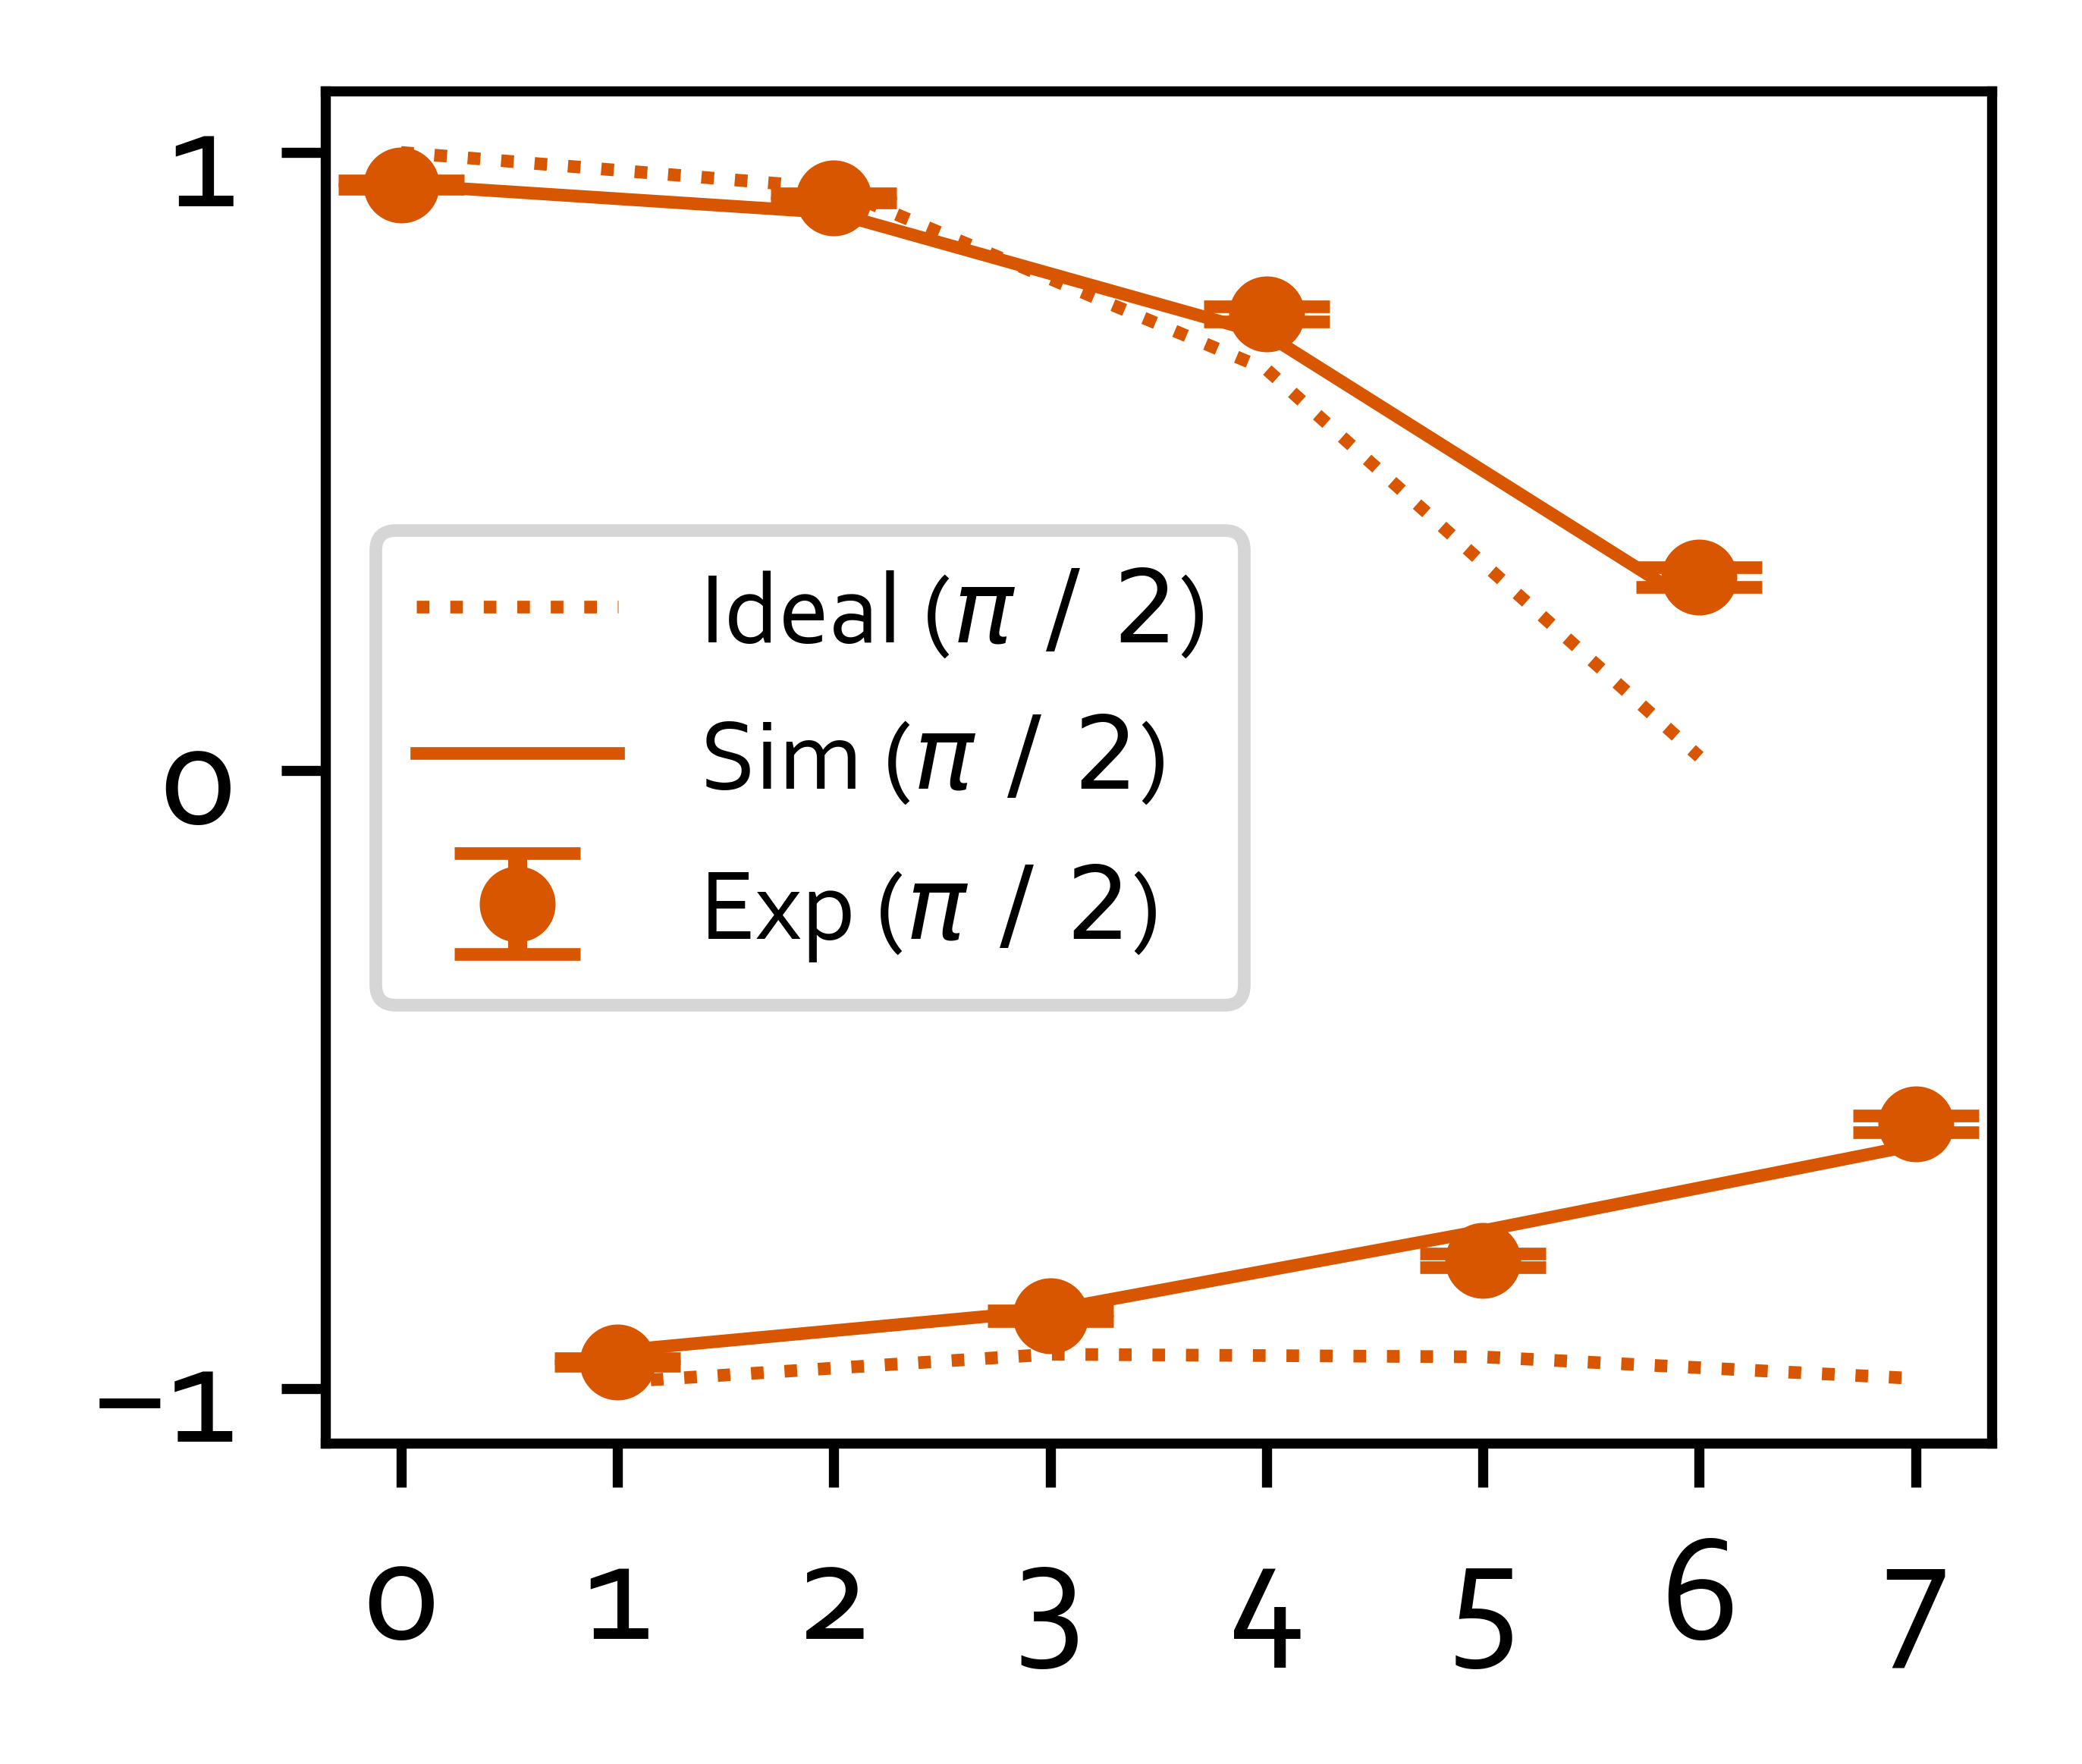

In [48]:
###figure 2b
fg0 = plt.figure(figsize=(6 * cm, 5 * cm), dpi=1200)
plt.tick_params(axis="both", which="major", labelsize=label_fontsize)
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
x_tick_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
plt.xticks(x_ticks, x_tick_labels, fontsize=label_fontsize)

plt.plot(
    Nfock[0::2],
    w_pihalf_formula[0::2],
    ls=":",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Ideal ($\pi\ / \ 2$)",
)
plt.plot(
    Nfock[1::2],
    w_pihalf_formula[1::2],
    ls=":",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
)

plt.plot(
    Nfock[0::2],
    w_id_k1[0::2],
    ls="-",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Sim ($\pi\ / \ 2$)",
)
plt.plot(
    Nfock[1::2],
    w_id_k1[1::2],
    ls="-",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
)

plt.errorbar(
    Nfock,
    2 * normal_pe_selection_scaling - 1,
    yerr=err_normal_selection_scaling,
    markersize=markersize,
    capsize=markersize,
    fmt="o",
    color=color_W_corr,
    ecolor=color_W_corr,
    label=r"Exp ($\pi\ / \ 2$)",
)

plt.legend(fontsize=8)
plt.show()


fg0.savefig(save_figs_path + "/fig2_normal_parity.pdf", dpi=1200)

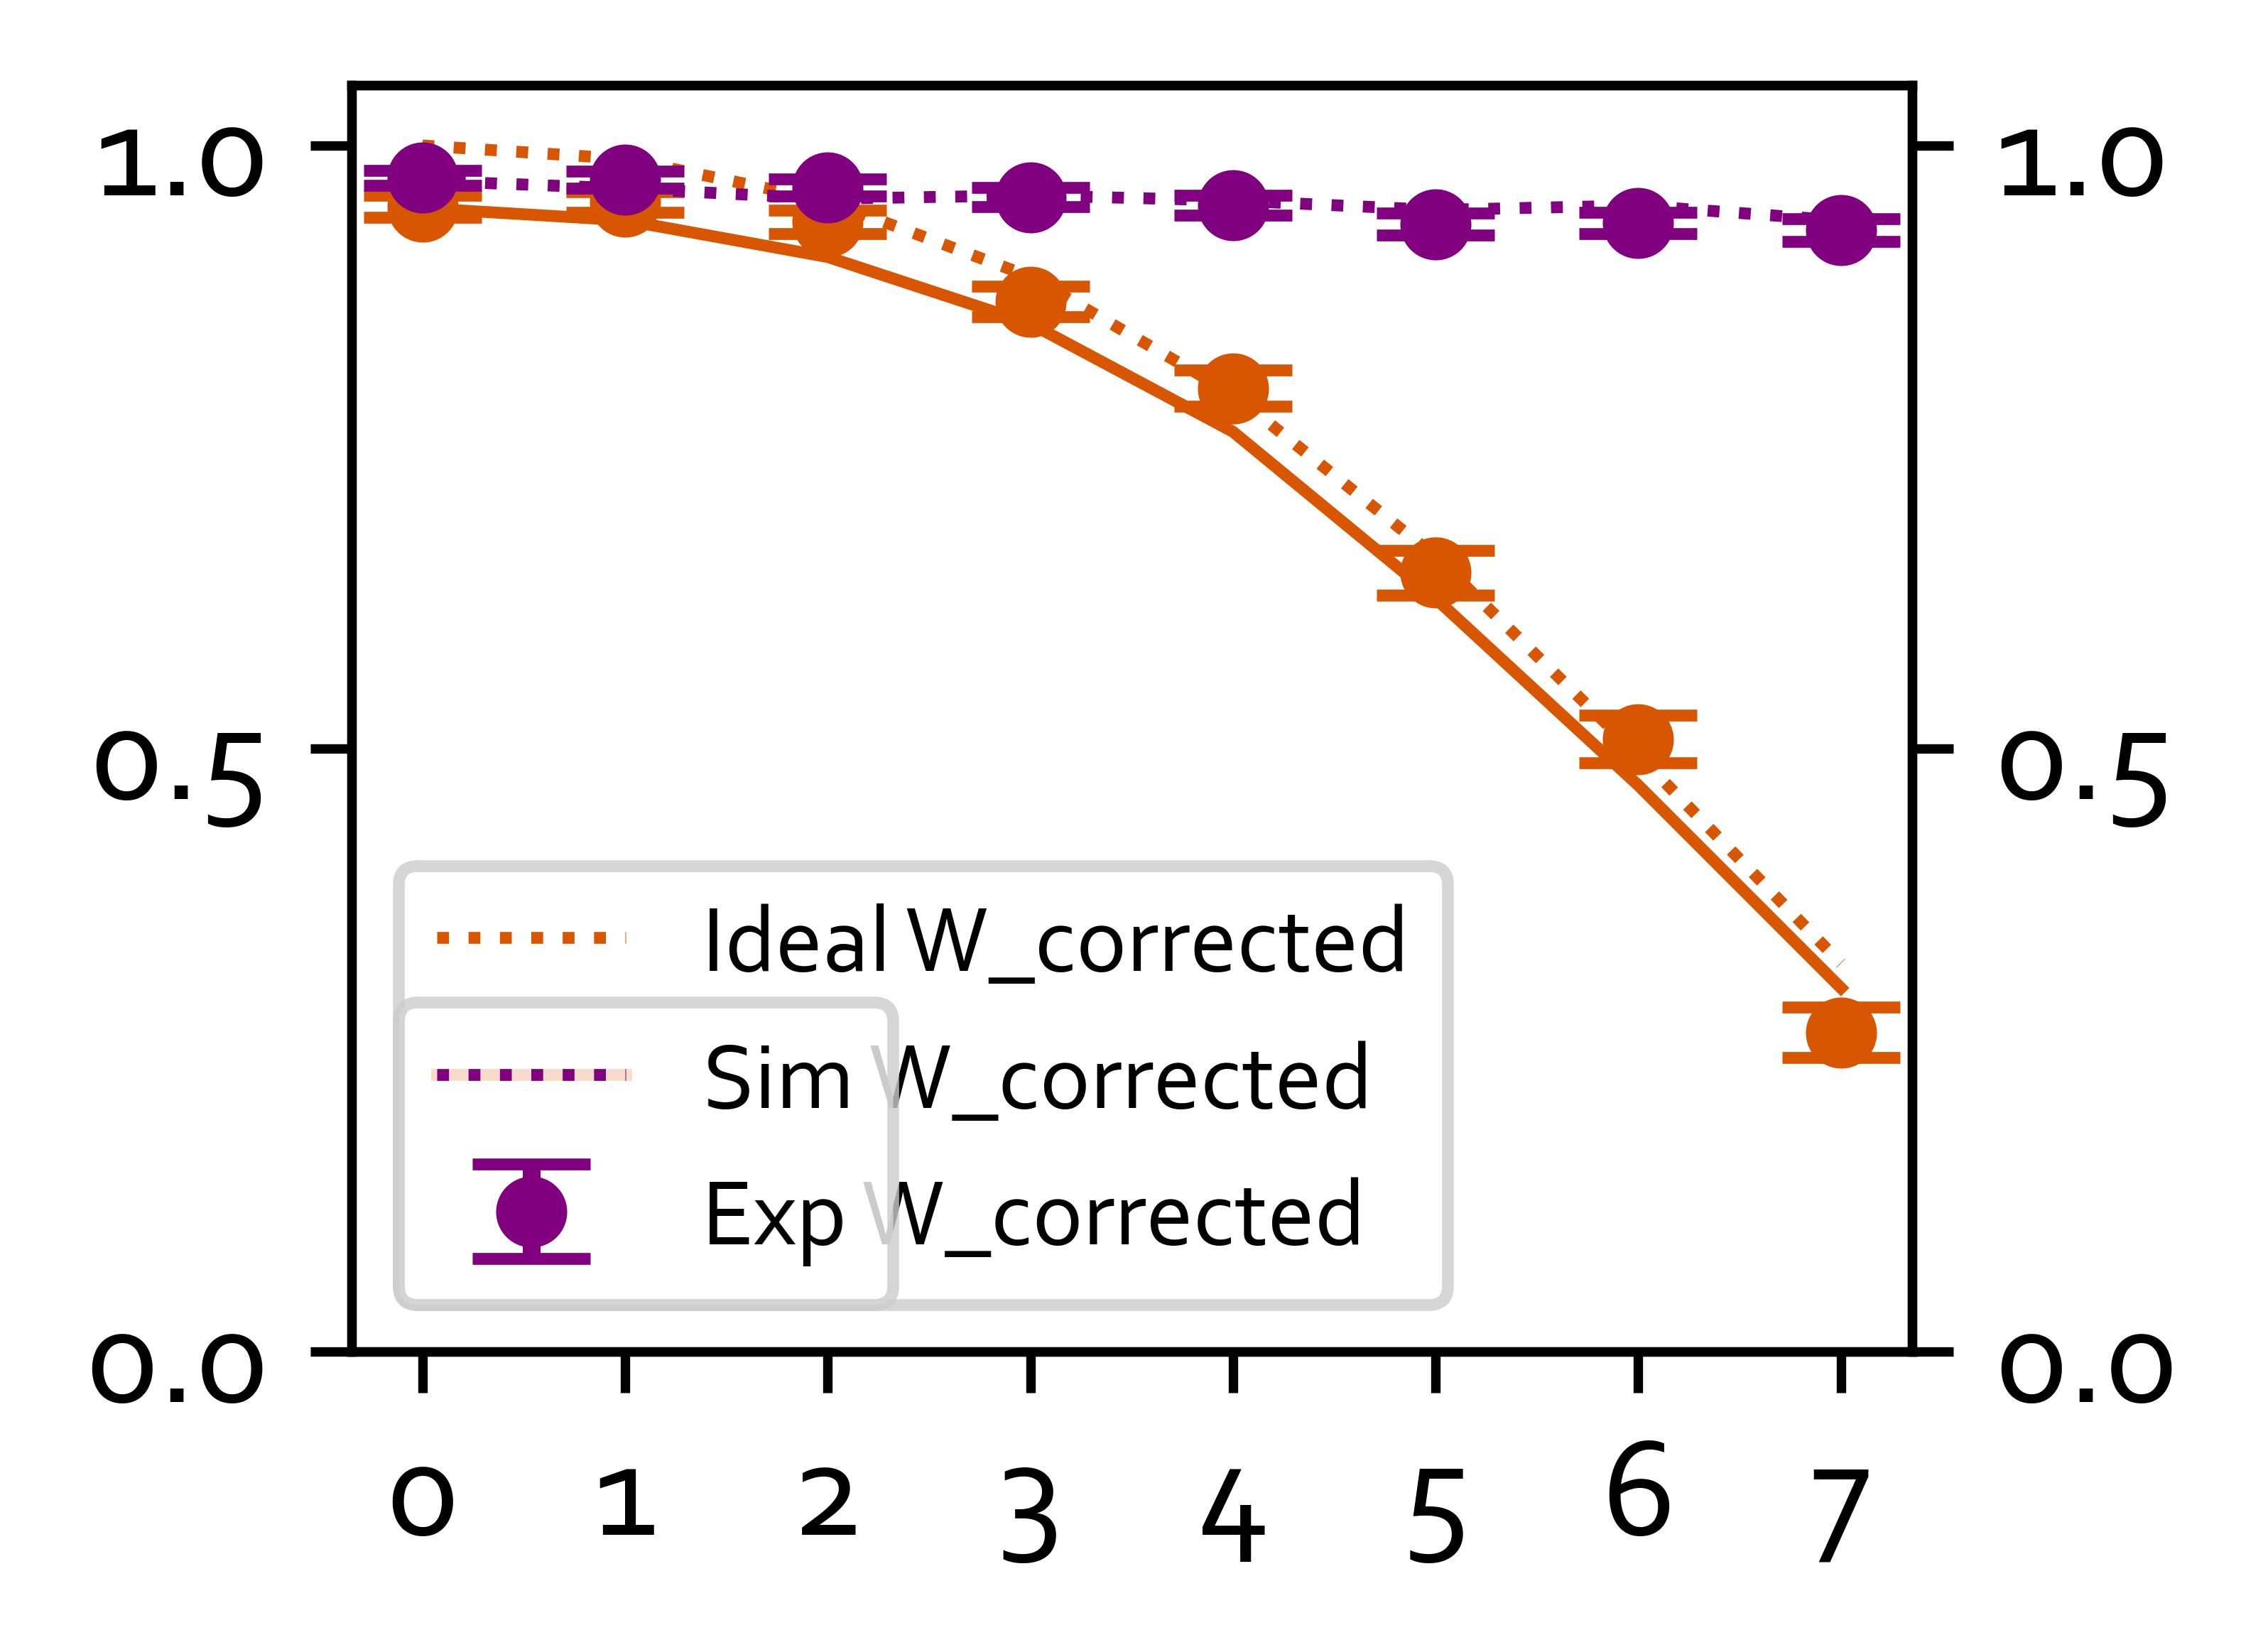

In [49]:
###figure 2c
fg2, ax2 = plt.subplots(figsize=(6 * cm, 5 * cm), dpi=1200)
plt.tick_params(axis="both", which="major", labelsize=label_fontsize)
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
x_tick_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
plt.xticks(x_ticks, x_tick_labels, fontsize=label_fontsize)

ax2.plot(
    Nfock,
    np.abs(w_2pi_formula),
    ls=":",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Ideal W_corrected",
)

ax2.plot(
    Nfock,
    np.abs(w_id_k3),
    ls="-",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Sim W_corrected",
)

ax2.errorbar(
    Nfock,
    np.abs(parity_selection_scaling),
    yerr=err_selection_scaling,
    markersize=markersize,
    capsize=markersize,
    fmt="o",
    color=color_W_corr,
    ecolor=color_W_corr,
    label="Exp W_corrected",
)
ax2.legend(fontsize=8)
ax2.set_ylim([0, 1.05])

ax3 = ax2.twinx()
plt.tick_params(axis="both", which="major", labelsize=label_fontsize)
ax3.plot(
    Nfock,
    output_scal,
    linestyle=":",
    color=color_Q,
    markersize=markersize,
    linewidth=linewidth,
    label="Sim",
)
ax3.errorbar(
    Nfock,
    pe_selection_scaling,
    yerr=err_scaling,
    markersize=markersize,
    capsize=markersize,
    fmt="o",
    color=color_Q,
    ecolor=color_Q,
    label="Exp",
)
ax3.legend(fontsize=8)
ax3.set_ylim([0, 1.05])

plt.show()

fg2.savefig(save_figs_path + "/fig2_Wcorr_Q.pdf", dpi=1200)

# Figure 3: Decoherence observables

### Pe and Parity v Tphi

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

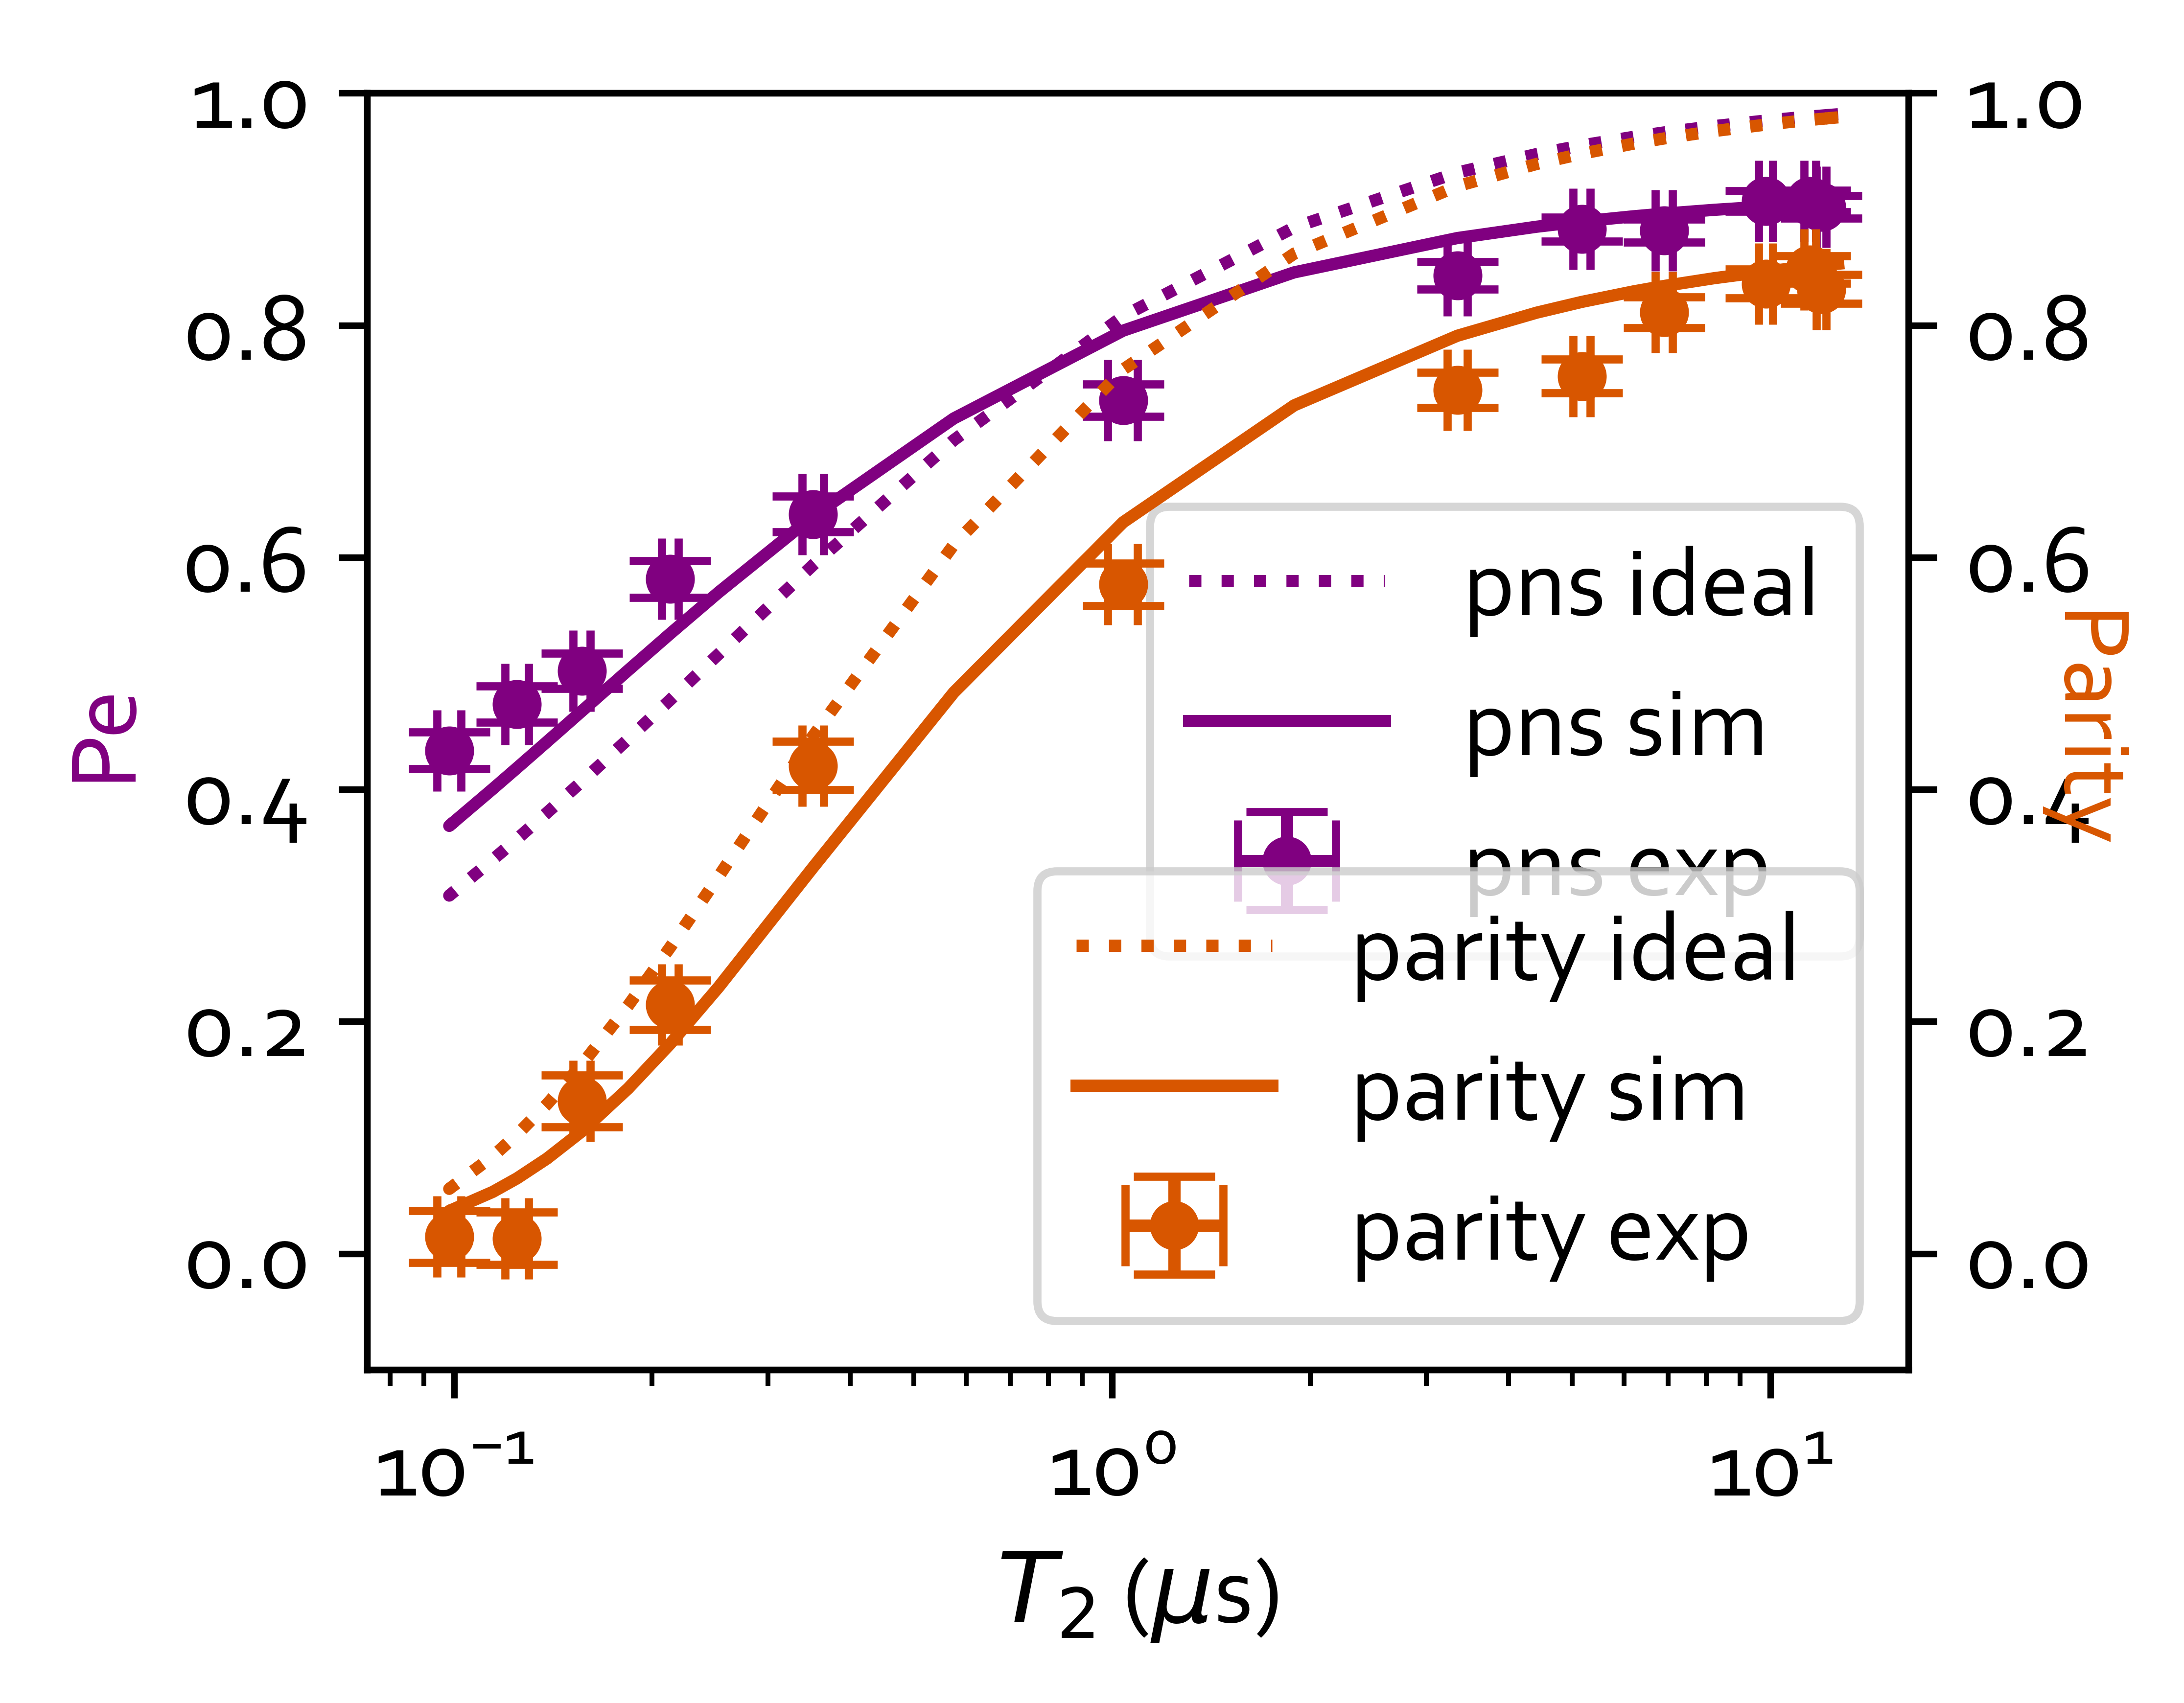

In [4]:
data_pns = np.load(r"results_ptsong\fig4a_PNS.npz")
data_W = np.load(r"results_ptsong\fig4a_W.npz")

T2_exp = data_W["T2_exp"]
parity_exp = data_W["parity_exp"]
T2_err = data_W["T2_err"]
err_parity = data_W["err_parity"]
w_formula = data_W["w_formula"]
parity_sim = data_W["parity_sim"]


# T2_exp_pns = data_pns["T2_exp"] # same as above
pns_exp = data_pns["pns_exp"]
err_pns = data_pns["err_pns"]
pe_formula = data_pns["pe_formula"]
pns_sim = data_pns["pns_sim"]

fig, ax1 = plt.subplots(figsize=(8.6 * cm, 7.17 * cm), dpi=1200)
ax1.plot(T2_exp * 1e-3, pe_formula, color=color_Q, linestyle=":", label="pns ideal")
ax1.plot(T2_exp * 1e-3, pns_sim, color=color_Q, label="pns sim")

ax1.errorbar(
    T2_exp[1::2] * 1e-3,
    pns_exp[1::2],
    xerr=T2_err[1::2],
    yerr=err_pns[1::2],
    ms=markersize,
    capsize=markersize,
    color=color_Q,
    fmt="o",
    ecolor=color_Q,
    label="pns exp",
)

ax1.set_xlabel(r"$T_2$ ($\mu$s)", fontsize=label_fontsize)
ax1.set_ylabel("Pe", fontsize=label_fontsize, color=color_Q)
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_xscale("log")
ax1.set_ylim(-0.1, 1)
ax1.legend(loc=7, prop={"size": label_fontsize})
plt.xticks(fontsize=label_fontsize)
plt.yticks(fontsize=label_fontsize)

ax2 = ax1.twinx()
ax2.plot(
    T2_exp * 1e-3, w_formula, color=color_W_corr, linestyle=":", label="parity ideal "
)
ax2.plot(T2_exp * 1e-3, parity_sim, color=color_W_corr, label="parity sim ")
ax2.errorbar(
    T2_exp[1::2] * 1e-3,
    parity_exp[1::2],
    xerr=T2_err[1::2],
    yerr=err_parity[1::2],
    ms=markersize,
    capsize=markersize,
    color=color_W_corr,
    fmt="o",
    ecolor=color_W_corr,
    label="parity exp",
)


ax2.set_xlabel(r"$T_2$ ($\mu$s)", fontsize=label_fontsize)
ax2.set_ylabel("Parity", fontsize=label_fontsize, color=color_W_corr, rotation=270)
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_xscale("log")
ax2.set_ylim(-0.1, 1)
ax2.legend(loc=4, prop={"size": label_fontsize})

plt.xticks(fontsize=label_fontsize)
plt.yticks(fontsize=label_fontsize)

# fig.savefig(save_figs_path + "/fig3_t2obs_small.pdf", dpi=1200)

In [17]:
T2_exp * 1e-3

array([12.68049371, 11.95395531, 12.40002997, 11.49224134, 10.84047203,
        9.84916935,  8.21931834,  6.89784426,  6.20054778,  5.17253448,
        4.41681758,  3.34641223,  1.89021605,  1.03913826,  0.57439294,
        0.35129787,  0.25238482,  0.21295256,  0.18385811,  0.15643631,
        0.13843111,  0.12463762,  0.1145433 ,  0.09832968,  0.09851076])

In [18]:
pns_exp

array([0.911621, 0.901726, 0.919928, 0.906979, 0.895451, 0.90698 ,
       0.895177, 0.881593, 0.882   , 0.882737, 0.859261, 0.842884,
       0.780569, 0.735415, 0.696765, 0.637192, 0.590029, 0.581171,
       0.530551, 0.502107, 0.477917, 0.473318, 0.446753, 0.433517,
       0.432443])

In [19]:
parity_exp

array([ 0.858412,  0.83116 ,  0.860775,  0.8481  ,  0.823486,  0.835801,
        0.845588,  0.811135,  0.815929,  0.756132,  0.804204,  0.744136,
        0.682587,  0.576596,  0.513571,  0.420439,  0.316535,  0.214381,
        0.187178,  0.131451,  0.074438,  0.01304 , -0.004879,  0.014726,
       -0.044152])

# Figure 4: Fidelities for decoherence and dimension

### Fidelity v T2

In [3]:
def extract_W_data(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays

    results_corr = np.zeros((numDims, 2))
    results_norm = np.zeros((numDims, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        # print(sim_fidelity)
        results_corr[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity_corr), np.std(fidelity_corr)]
        )
        results_norm[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity_norm), np.std(fidelity_norm)]
        )

    return results_corr, results_norm


def extract_Q_data(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((numDims, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_Bayes_BME"].squeeze().astype(float)
        # print(sim_fidelity)
        results[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results

In [4]:
W_corr_exp_results, W_norm_exp_results = extract_W_data(W_exp_directory, numDims=5)

Q_exp_results = extract_Q_data(Q_exp_directory, numDims=5)

In [5]:
W_sim_grape_directory = r"results_dimensions\sim\W\grape_target_states"
W_corr_sim_grape_results, W_norm_sim_grape_results = extract_W_data(
    W_sim_grape_directory, numDims=5
)

W_sim_ideal_directory = r"results_dimensions\sim\W\ideal_target_states"
W_corr_sim_ideal_results, W_norm_sim_ideal_results = extract_W_data(
    W_sim_ideal_directory, numDims=7
)


Q_sim_grape_directory = r"results_dimensions\sim\Q\grape_target_states"
Q_sim_grape_results = extract_Q_data(Q_sim_grape_directory, numDims=5)

Q_sim_ideal_directory = r"results_dimensions\sim\Q\ideal_target_states"
Q_sim_ideal_results = extract_Q_data(Q_sim_ideal_directory, numDims=7)

In [6]:
def extract_W_T2_fidelities(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results_corr = np.zeros((5, 2))
    results_norm = np.zeros((5, 2))
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)

        results_corr[int(file_name[13]), :] = np.array(
            [np.average(fidelity_corr), np.std(fidelity_corr)]
        )
        results_norm[int(file_name[13]), :] = np.array(
            [np.average(fidelity_norm), np.std(fidelity_norm)]
        )

    return results_corr, results_norm  # , final_rho_BME_corr, final_rho_BME_norm


def extract_Q_T2_fidelities(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_Bayes_BME"].squeeze()
        # print(fidelity)
        # final_rho_BME = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        results[int(file_name[13]), :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results  # , final_rho_BME

In [7]:
Q_exp_T2_fidelities = extract_Q_T2_fidelities(Q_exp_T2_directory)


W_corr_exp_T2_fidelities, W_norm_exp_T2_fidelities = extract_W_T2_fidelities(
    W_exp_T2_directory
)

In [8]:
Q_exp_T2_fidelities

array([[0.94710438, 0.00633381],
       [0.94556892, 0.02066078],
       [0.94358275, 0.02030297],
       [0.87524378, 0.05412754],
       [0.86662358, 0.05054177]])

In [9]:
Q_sim_T2_grape_directory = r"results_t2\sim\Q\grape_target_states"
Q_sim_T2_grape_results = extract_Q_T2_fidelities(Q_sim_T2_grape_directory)

# Q_sim_T2_ideal_directory = r"results_t2\sim\Q\ideal_target_states"
# Q_sim_T2_ideal_results = extract_Q_T2_data(Q_sim_T2_ideal_directory)

W_sim_T2_grape_directory = r"results_t2\sim\W\grape_target_states"
W_corr_sim_T2_grape_results, W_norm_sim_T2_grape_results = extract_W_T2_fidelities(
    W_sim_T2_grape_directory
)

# W_sim_T2_ideal_directory = r"results_t2\sim\W\ideal_target_states"
# W_corr_sim_T2_ideal_results, W_norm_sim_T2_ideal_results = extract_W_T2_data(
#     W_sim_T2_ideal_directory
# )

In [10]:
Q_exp_T2_fidelities

array([[0.94710438, 0.00633381],
       [0.94556892, 0.02066078],
       [0.94358275, 0.02030297],
       [0.87524378, 0.05412754],
       [0.86662358, 0.05054177]])

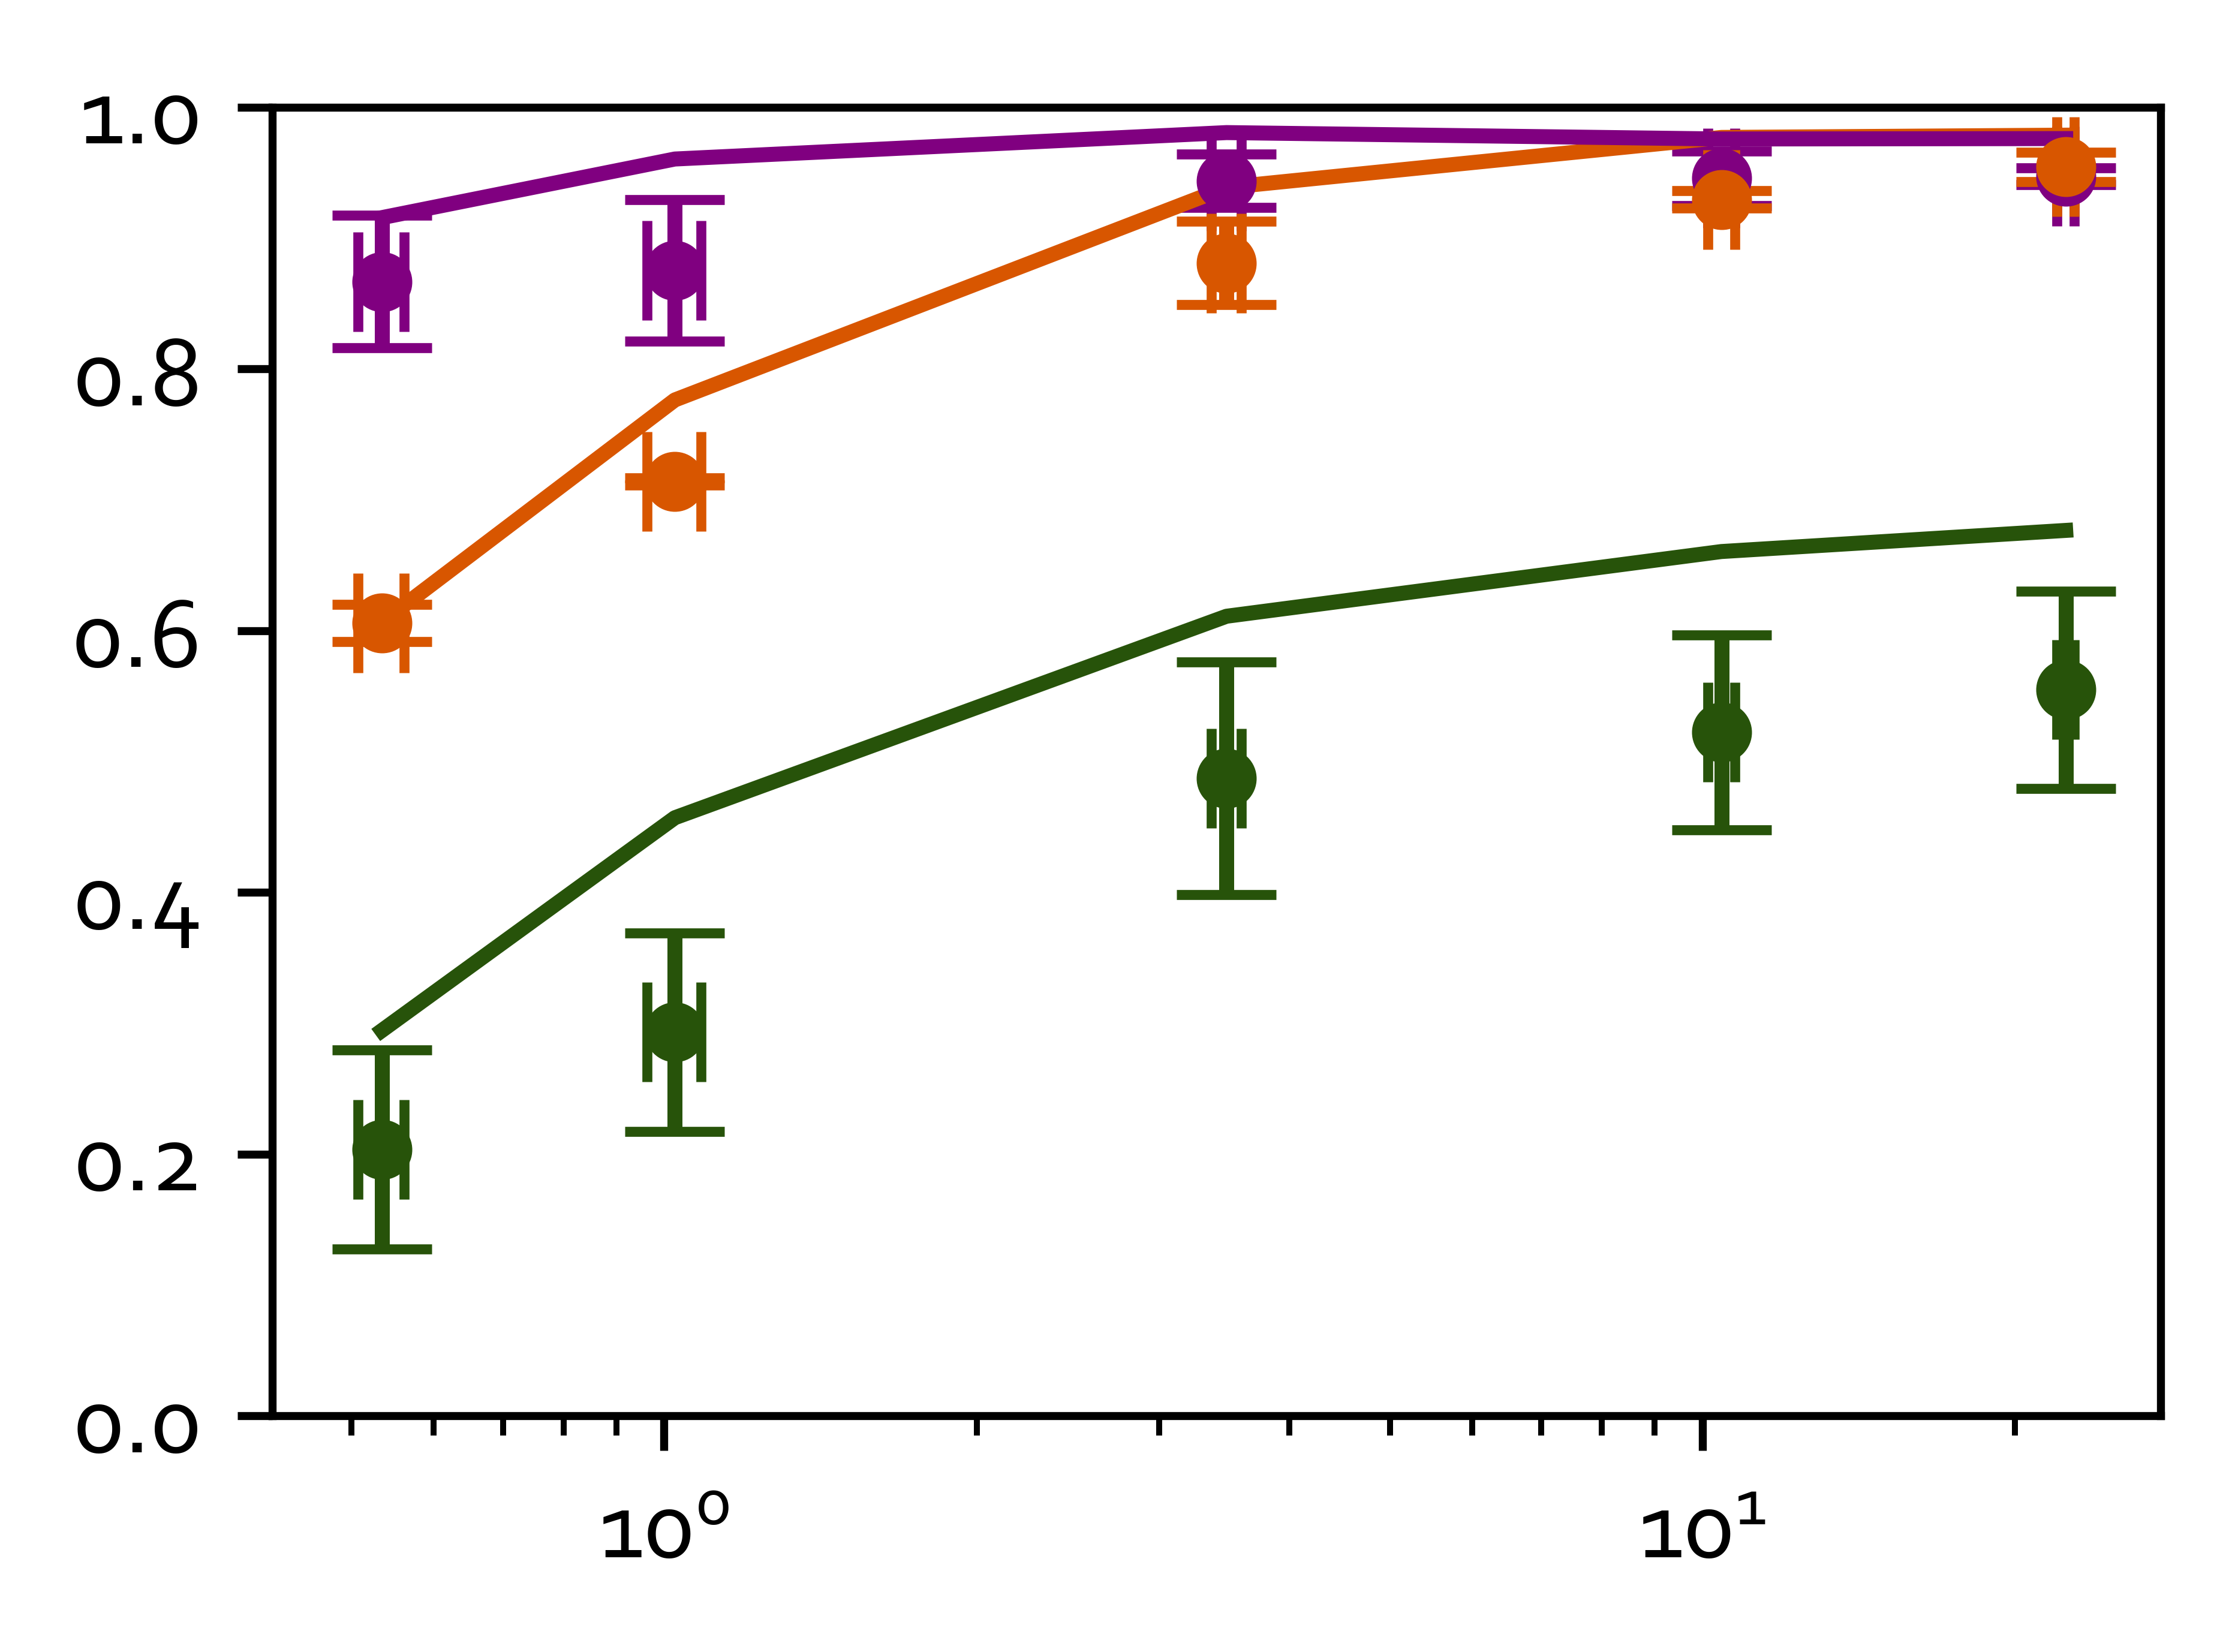

In [64]:
fig, ax = plt.subplots(figsize=half_width_dims, dpi=1200)

# plt.setp(ax.spines.values(), linewidth=2 * cm)

# ax.tick_params(axis="x", which="major", length=10 * cm, width=3 * cm)
# ax.tick_params(axis="y", which="major", length=12 * cm, width=3 * cm)
# ax.tick_params(axis="both", which="minor", length=6 * cm, width=2 * cm)

ax.set_ylim([-0.1, 1])
T2s = exp_params.badt2_list / 1e3
T2s_err = exp_params.badt2_err / 1e3

my_labels = {"Q exp": "Q exp", "W corr exp": "W corr exp", "W norm exp": "W norm exp"}

line_Qexp = ax.errorbar(
    x=T2s,
    y=Q_exp_T2_fidelities[:, 0],
    yerr=Q_exp_T2_fidelities[:, 1],
    xerr=T2s_err,
    c=color_Q,
    fmt="o",
    label="Q exp",
    #     marker=marker_shape[i],
    markersize=markersize,
    capsize=markersize,
    #     edgecolor=edge_color[i],
    #     linewidth=lw,
)

line_Wcorrexp = ax.errorbar(
    x=T2s,
    y=W_corr_exp_T2_fidelities[:, 0],
    yerr=W_corr_exp_T2_fidelities[:, 1],
    xerr=T2s_err,
    c=color_W_corr,
    fmt="o",
    label="W corr exp",
    #     marker=marker_shape[i],
    markersize=markersize,
    capsize=markersize,
    #     edgecolor=edge_color[i],
    #     linewidth=lw,
)


line_Wcorrsim = plt.plot(
    T2s,
    W_corr_sim_T2_grape_results[:, 0],
    "-",
    color=color_W_corr,
    label="W corr grape sim",
)

line_Wnormexp = ax.errorbar(
    x=T2s,
    y=W_norm_exp_T2_fidelities[:, 0],
    yerr=W_norm_exp_T2_fidelities[:, 1],
    xerr=T2s_err,
    c=color_W_norm,
    fmt="o",
    label="W norm exp",
    #     marker=marker_shape[i],
    markersize=markersize,
    capsize=markersize,
    #     edgecolor=edge_color[i],
    #     linewidth=lw,
)


line_Wnormsim = plt.plot(
    T2s,
    W_norm_sim_T2_grape_results[:, 0],
    "-",
    color=color_W_norm,
    label="W norm grape sim",
)

line_Qsim = plt.plot(
    T2s,
    Q_sim_T2_grape_results[:, 0],
    "-",
    color=color_Q,
    label="Q grape sim",
)

ax.set_xscale("log")
ax.set_ylim([0, 1])

# ax.legend()
# ax.set_title("Fidelity vs T2")
plt.show()

fig.savefig(save_figs_path + "/fig4_t2.pdf", dpi=1200)

In [65]:
Q_exp_T2_fidelities[:, 0]

array([0.94710438, 0.94556892, 0.94358275, 0.87524378, 0.86662358])

In [66]:
Q_sim_T2_grape_results[:, 0]

array([0.97596207, 0.97565596, 0.98054595, 0.96036173, 0.91556128])

In [67]:
T2s

array([22.38912 , 10.43408 ,  3.481396,  1.02416 ,  0.53468 ])

### Fidelity v Dimension

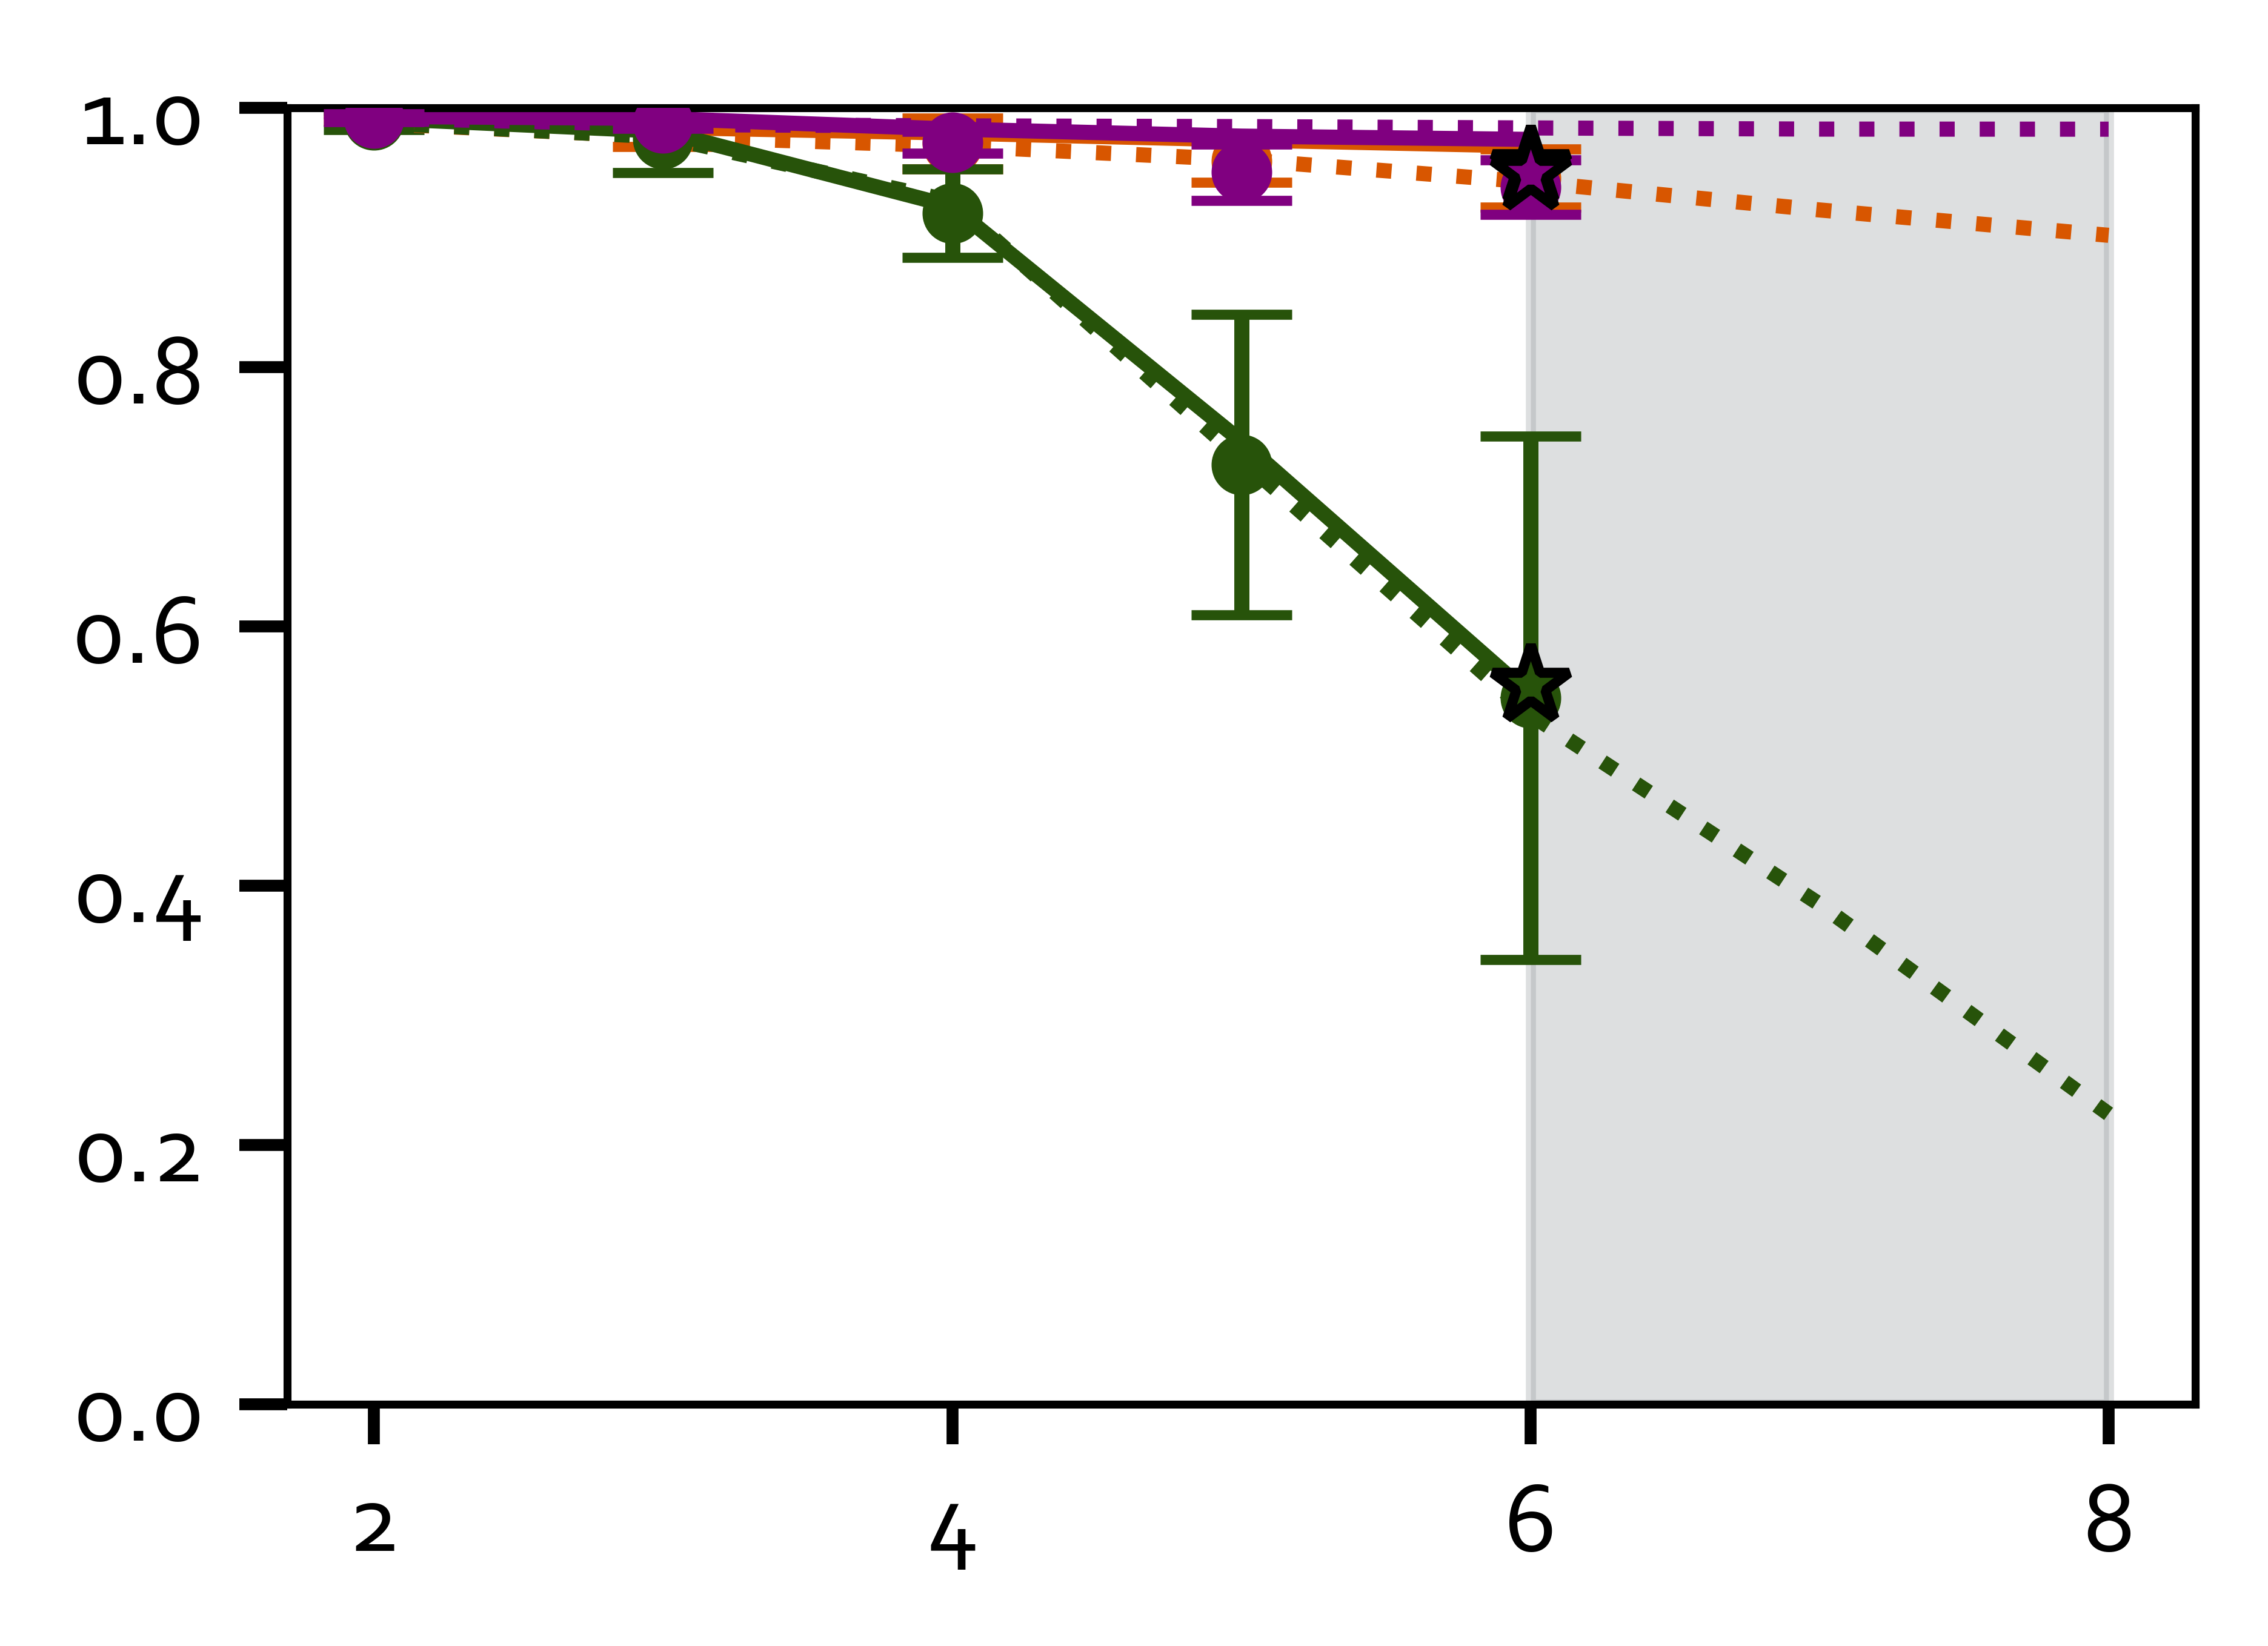

In [58]:
fig = plt.figure(figsize=(8.6 * cm, 6 * cm), dpi=1200)
ax = fig.add_subplot(111)
plt.setp(ax.spines.values(), linewidth=2 * cm)


ax.tick_params(axis="x", which="major", length=10 * cm, width=3 * cm)
ax.tick_params(axis="y", which="major", length=12 * cm, width=3 * cm)
ax.tick_params(axis="both", which="minor", length=6 * cm, width=2 * cm)

ax.set_ylim([0, 1])
sim_dimensions = [2, 3, 4, 5, 6, 7, 8]
exp_dimensions = [2, 3, 4, 5, 6]
s = [5, 5, 5, 5, 5, 0, 0]

my_labels = {"Q exp": "Q exp", "W corr exp": "W corr exp", "W norm exp": "W norm exp"}

for i in range(len(exp_dimensions)):
    ax.errorbar(
        x=i + 2,
        y=Q_exp_results[i, 0],
        yerr=Q_exp_results[i, 1],
        c=color_Q,
        fmt="o",
        label=my_labels["Q exp"],
        #     marker=marker_shape[i],
        markersize=s[i],
        capsize=s[i],
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
        zorder=3,
    )
    my_labels["Q exp"] = "_nolegend_"
    ax.errorbar(
        x=i + 2,
        y=W_corr_exp_results[i, 0],
        yerr=W_corr_exp_results[i, 1],
        c=color_W_corr,
        fmt="o",
        label=my_labels["W corr exp"],
        #     marker=marker_shape[i],
        markersize=s[i],
        capsize=s[i],
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
        zorder=1,
    )
    my_labels["W corr exp"] = "_nolegend_"
    ax.errorbar(
        x=i + 2,
        y=W_norm_exp_results[i, 0],
        yerr=W_norm_exp_results[i, 1],
        c=color_W_norm,
        fmt="o",
        label=my_labels["W norm exp"],
        #     marker=marker_shape[i],
        markersize=s[i],
        capsize=s[i],
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
        zorder=2,
    )
    my_labels["W norm exp"] = "_nolegend_"


# plt.plot(dimensions, Q_sim_grape_results[:, 0], ":", color=color_Q, label="Q sim")

plt.plot(
    sim_dimensions,
    W_corr_sim_ideal_results[:, 0],
    ":",
    color=color_W_corr,
    label="W corr ideal sim",
)

plt.plot(
    exp_dimensions,
    W_corr_sim_grape_results[:, 0],
    "-",
    color=color_W_corr,
    label="W corr grape sim",
)

plt.plot(
    sim_dimensions,
    W_norm_sim_ideal_results[:, 0],
    ":",
    color=color_W_norm,
    label="W norm ideal sim",
)
plt.plot(
    exp_dimensions,
    W_norm_sim_grape_results[:, 0],
    "-",
    color=color_W_norm,
    label="W norm grape sim",
)

plt.plot(
    sim_dimensions,
    Q_sim_ideal_results[:, 0],
    ":",
    color=color_Q,
    label="Q ideal sim",
)
plt.plot(
    exp_dimensions,
    Q_sim_grape_results[:, 0],
    "-",
    color=color_Q,
    label="Q grape sim",
)

plt.plot(
    6,
    Q_exp_T2_fidelities[0, 0],
    "*",
    color=color_Q,
    label="Q cat",
    mec="black",
    markersize=8,
    zorder=5,
)
plt.plot(
    6,
    W_corr_exp_T2_fidelities[0, 0],
    "*",
    color=color_W_corr,
    label="W corr cat",
    mec="black",
    markersize=8,
    zorder=4,
)
plt.plot(
    6,
    W_norm_exp_T2_fidelities[0, 0],
    "*",
    color=color_W_norm,
    mec="black",
    label="W norm cat",
    markersize=8,
    zorder=4,
)

ax.fill_between(range(6, 9), 0, 1, alpha=0.3, color="#909599")
# ax.legend()
# ax.set_title("Fidelity vs " + r"$\rho$" + " Dimension")
plt.show()

fig.savefig(save_figs_path + "/fig4_highdims.pdf", dpi=1200)

# Get Wigner plots

In [31]:
from matplotlib.ticker import (
    MultipleLocator,
    FormatStrFormatter,
    FixedLocator,
    MaxNLocator,
    LogLocator,
    FixedFormatter,
)



def imshow(
    Amp,
    figname=None,
    vmiddle=0.1,
    Figsize=(10, 8),
    extent=[0, 1, 0, 1],
    xround="%0.0f",
    yround="%0.1f",
    xlabel=r"$\delta\Phi/\Phi_0\times10^3$",
    ylabel=r"Frequency (GHz)",
    cbarlabel=r"$|r|$",
    color="bwr",
    interpolations="gaussian",
    vmax=None,
    vmin=None,
    settick=False,
    setcolor=False,
    title=None,
):

    if figname != None:

        fig = plt.figure(figname, figsize=Figsize)

    else:

        fig = plt.figure(figsize=Figsize)

    ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])


    if vmax == None:

        c = plt.imshow(
            Amp,
            aspect="auto",
            interpolation=interpolations,
            origin="upper",
            extent=extent,

            vmax=np.max(Amp),
            vmin=np.min(Amp),
        )

    else:

        c = plt.imshow(
            Amp,
            aspect="auto",
            interpolation=interpolations,
            origin="upper",
            extent=extent,

            vmax=vmax,
            vmin=vmin,
        )


    c.set_cmap(color)

    #    c.set_cmap('jet')

    cbar = fig.colorbar(c)

    cbar.ax.tick_params(labelsize=18)

    cbar.set_label(cbarlabel, rotation=270, labelpad=20, fontsize=20)


    if settick == True:

        for tick in ax1.xaxis.get_major_ticks():

            tick.label.set_size(fontsize=20)

            ax1.xaxis.set_major_locator(FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

        for tick in ax1.yaxis.get_major_ticks():

            tick.label.set_size(fontsize=20)

        ax1.xaxis.set_major_formatter(FormatStrFormatter(xround))

        ax1.yaxis.set_major_formatter(FormatStrFormatter(yround))


    else:


        for tick in ax1.xaxis.get_major_ticks():

            tick.label.set_size(fontsize=20)

        for tick in ax1.yaxis.get_major_ticks():

            tick.label.set_size(fontsize=20)

        ax1.xaxis.set_major_formatter(FormatStrFormatter(xround))

        ax1.yaxis.set_major_formatter(FormatStrFormatter(yround))


    ax1.set_xlabel(xlabel, fontsize=24)

    ax1.set_ylabel(ylabel, fontsize=24)

    if title != None:

        ax1.set_title(title)

    plt.pause(0.1)


    plt.show()

    return fig



def plot_wigner(rho, cmap, fig=None, ax=None):
    """

    Plot the Wigner function and the Fock state distribution given a density matrix for

    a harmonic oscillator mode.
    """


    xvec = np.linspace(-2, 2, 201)

    lim = 2 / np.pi


    W = wigner(rho, xvec, xvec, g=2)[::-1]

    fg = imshow(
        W,
        figname=None,
        vmiddle=0.1,
        Figsize=(10, 8),
        extent=[xvec[0], xvec[-1], xvec[0], xvec[-1]],
        xround="%0.1f",
        yround="%0.1f",
        xlabel=r"$Re\ (\alpha)$",
        ylabel=r"$Im\ (\alpha)$",
        cbarlabel="Wigner function",
        color="bwr",
        interpolations=None,
        vmax=lim,
        vmin=-lim,
        settick=False,
        setcolor=False,
    )


    return fg

In [49]:
def plot_wigner_clara(rho, cmap, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for
    a harmonic oscillator mode.
    """
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    if isket(rho):
        rho = ket2dm(rho)

    xvec = np.linspace(-2, 2, 501)

    W = wigner(rho, xvec, xvec)
    wlim = abs(W).max()

    ax.contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-wlim, wlim),
        # cmap=mpl.cm.get_cmap("coolwarm"),
        cmap=cmap,
    )
    # ax.set_xlabel(r"$x_1$", fontsize=16)
    # ax.set_ylabel(r"$x_2$", fontsize=16)
    plt.xticks(visible=False)
    plt.yticks(visible=False)

    return fig, ax

In [50]:
def extract_W_T2_rhos(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    # results_corr = np.zeros((5, 2))
    # results_norm = np.zeros((5, 2))
    final_rho_BME_corr = np.empty((5, 4, 6, 6), dtype=np.complex_)
    final_rho_BME_norm = np.empty((5, 4, 6, 6), dtype=np.complex_)
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        # fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        # fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        final_rho_BME_corr[int(file_name[13]), :] = data["final_rho_BME_corr"].squeeze()
        final_rho_BME_norm[int(file_name[13]), :] = data["final_rho_BME_norm"].squeeze()
        # print(sim_fidelity)
        # results_corr[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity_corr), np.std(fidelity_corr)]
        # )
        # results_norm[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity_norm), np.std(fidelity_norm)]
        # )

    return final_rho_BME_corr, final_rho_BME_norm


def extract_Q_T2_rhos(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))
    final_rho_BME = np.empty((5, 4, 6, 6), dtype=np.complex_)
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        # fidelity = data["F_Bayes_BME"].squeeze()
        final_rho_BME[int(file_name[13]), :] = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        # results[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity), np.std(fidelity)]
        # )

    return final_rho_BME

In [51]:
Q_exp_T2_rhos = extract_Q_T2_rhos(Q_exp_T2_directory)
W_corr_exp_T2_rhos, W_norm_exp_T2_rhos = extract_W_T2_rhos(W_exp_T2_directory)

In [55]:
which_t2_to_plot = 0  # from 0 to 4, from highest (perfect) to lowest (worst) T2:
which_cat_to_plot = 3  # from 0 to 3,

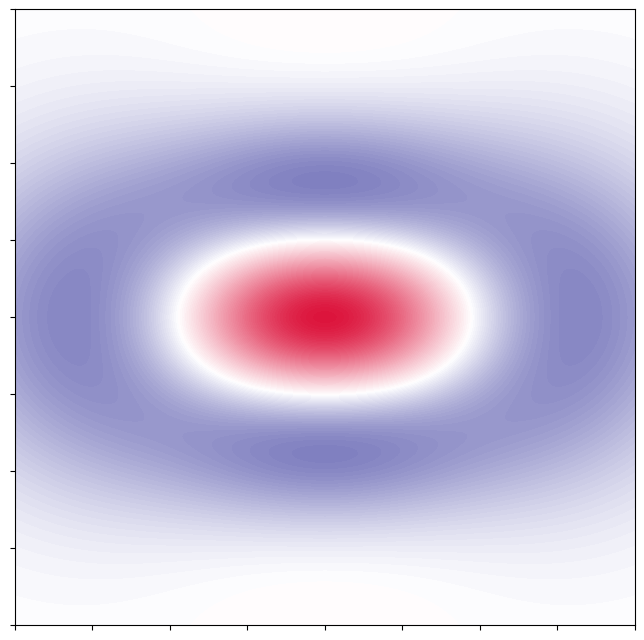

In [60]:
target = (coherent(10, 1) - coherent(10, -1 * 1)).unit()
dm = ket2dm(target)

fgideal, _ = plot_wigner_clara(dm, cmap=wigner_custom_cmap)
fgideal.savefig(save_figs_path + f"/ideal_wigner.pdf", dpi=1200)

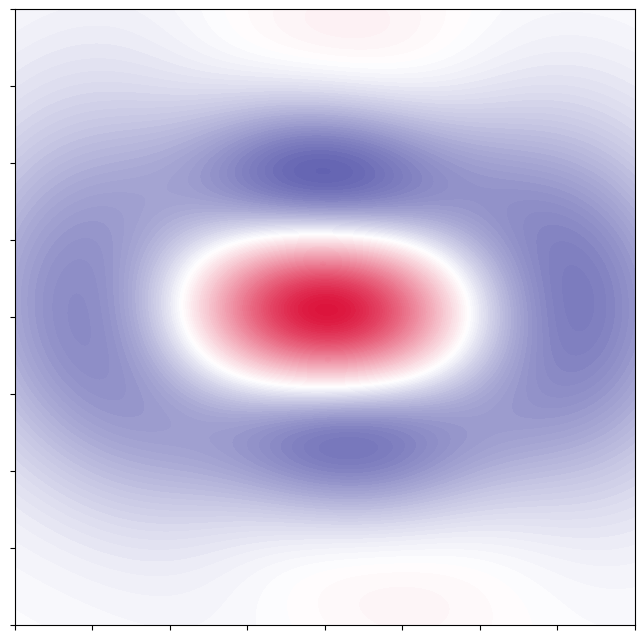

In [61]:
fg1, _ = plot_wigner_clara(
    Qobj(Q_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]), wigner_custom_cmap
)

fg1.savefig(save_figs_path + f"/Q_T2={which_t2_to_plot}.pdf", dpi=1200)

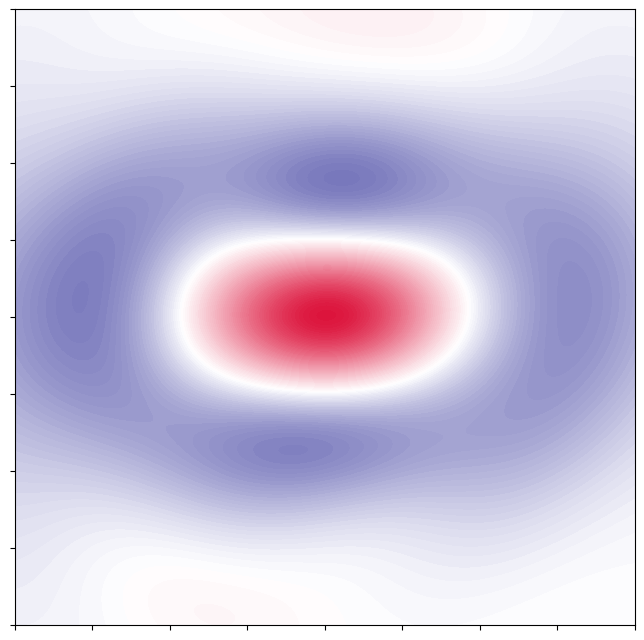

In [57]:
fg2, _ = plot_wigner_clara(
    Qobj(W_corr_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]),
    wigner_custom_cmap,
)
fg2.savefig(save_figs_path + f"/Wcorr_T2={which_t2_to_plot}.pdf", dpi=1200)

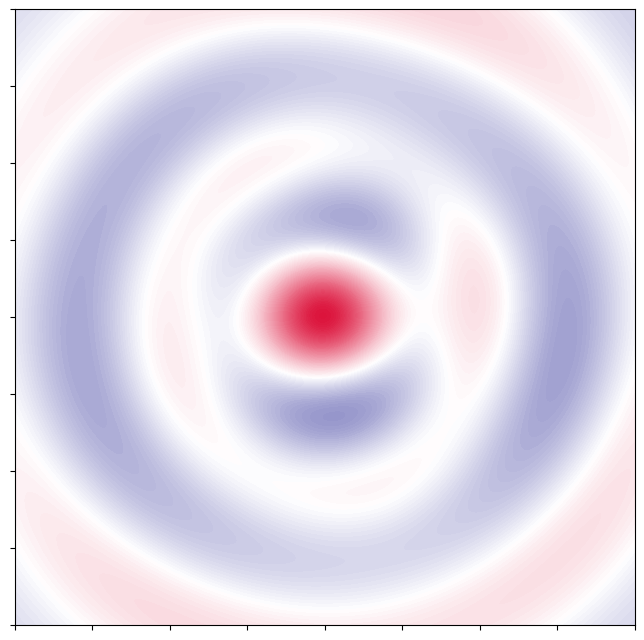

In [58]:
# Plot the corrected Wigner reconstructed
fg4, _ = plot_wigner_clara(
    Qobj(W_norm_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]),
    wigner_custom_cmap,
)
fg4.savefig(save_figs_path + f"/Wnorm_T2={which_t2_to_plot}.pdf", dpi=1200)